<a href="https://colab.research.google.com/github/devdaveddev/Epilepsy-Recognition/blob/main/Epileptic_Seizure_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Epileptic Seizure Recognition.csv (1).zip")

In [ ]:
file = "/content/Epileptic Seizure Recognition.csv (1).zip"

In [ ]:
def remove(df):
  df = df.dropna();

  df = df.drop_duplicates();

  from scipy.stats import zscore
  ncols = df.select_dtypes(include=['number'] ).columns
  z_scores = df[ncols].apply(zscore)
  df = df[(z_scores.abs() < 3).all(axis=1)]

  return df

cleaned_df = remove(df)



print("\nCleaned Data:")
print(cleaned_df)


output_path = '/content/Epileptic Seizure Recognition.csv (1).zip'
cleaned_df.to_csv(output_path, index=False)
print(f"\nCleaned data saved to {output_path}")



Cleaned Data:
          Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
5       X14.V1.56   55   28   18   16   16   19   25   40   52  ...   -12   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  y  
0

In [ ]:


df = pd.read_csv("/content/Epileptic Seizure Recognition.csv (1).zip")
file = "/content/Epileptic Seizure Recognition.csv (1).zip"

def remove(df):
    df = df.dropna()
    df = df.drop_duplicates()

    from scipy.stats import zscore

    ncols = df.select_dtypes(include=['number']).columns
    z_scores = df[ncols].apply(zscore)
    df = df[(z_scores.abs() < 3).all(axis=1)]

    return df

#  remove function and assign the result to cleaned_df
cleaned_df = remove(df)

print("\nCleaned Data:")
print(cleaned_df)

# Save the cleaned data to a new CSV file
output_path = '/content/Epileptic Seizure Recognition.csv (1).zip'
print(f"\nCleaned data saved to {output_path}")


Cleaned Data:
         Unnamed   X1   X2  X3   X4   X5   X6   X7   X8  X9  ...  X170  X171  \
1        X8.V1.1  -32  -39 -47  -37  -32  -36  -57  -73 -85  ...    57    64   
2      X16.V1.60 -105 -101 -96  -92  -89  -95 -102 -100 -87  ...   -82   -81   
3      X20.V1.54   -9  -65 -98 -102  -78  -48  -16    0 -21  ...     4     2   
4      X14.V1.56   55   28  18   16   16   19   25   40  52  ...   -12   -31   
5      X3.V1.191  -55   -9  52  111  135  129  103   72  37  ...  -125   -99   
...          ...  ...  ...  ..  ...  ...  ...  ...  ...  ..  ...   ...   ...   
9685  X21.V1.762  -39  -16 -13  -14  -68  -84  -92  -61 -89  ...  -102   -75   
9686  X22.V1.114  -22  -22 -23  -26  -36  -42  -45  -42 -45  ...    15    16   
9688    X8.V1.28   14    6 -13  -16   10   26   27   -9   4  ...   -65   -48   
9689  X10.V1.932  -40  -25  -9  -12   -2   12    7   19  22  ...   121   135   
9690  X16.V1.210   29   41  57   72   74   62   54   43  31  ...   -59   -25   

      X172  X173  X174  

In [ ]:
import numpy as np
from scipy.signal import hilbert

def EMD(signal, max_iter=100, tol=0.001):
    """
    Performs Empirical Mode Decomposition (EMD) on the given signal.

    Args:
        signal: The input signal as a NumPy array.
        max_iter: Maximum number of iterations for sifting.
        tol: Tolerance for stopping the sifting process.

    Returns:
        A list of IMFs (Intrinsic Mode Functions) extracted from the signal.
    """
    # Convert signal to a NumPy array if it's not already
    signal = np.array(signal)

    imfs = []
    residue = signal.copy()

    # Check if the signal has more than one element before proceeding
    if residue.size > 1:  # Check against residue size instead of len
        while residue.size > 1: # Check against residue size to avoid division by zero
            imf = residue.copy()
            for i in range(max_iter):
                # Convert imf to numeric, handling errors by coercing to NaN
                imf_numeric = pd.to_numeric(imf, errors='coerce')

                mean_envelope = (
                    np.maximum.reduce([imf_numeric, np.flipud(imf_numeric)])
                    + np.minimum.reduce([imf_numeric, np.flipud(imf_numeric)])
                ) / 2
                imf = imf_numeric - mean_envelope

                # Check for stopping condition
                if np.all(np.abs(imf - mean_envelope) <= tol):
                    break

            imfs.append(imf)
            residue = residue - imf

    # Handle case where signal has 0 or 1 element
    else:
        imfs.append(signal)
    return imfs


signals = cleaned_df['X1'].values  # Assuming 'X1' is your signal column, adjust if needed

# Apply EMD to each signal
imfs_list = []
for signal in signals:
    imfs = EMD(signal)  # Call EMD with the signal
    imfs_list.append(imfs)


imf_energies = []
for signal_imfs in imfs_list:
    signal_energies = [np.sum(imf**2) for imf in signal_imfs]
    imf_energies.append(signal_energies)

cleaned_df['imf_energies'] = imf_energies  # Add imf_energies as a new column

print("\nCleaned Data with IMF Energies:")
print(cleaned_df)


output_path = '/content/Epileptic_Seizure_Recognition_with_IMFs.csv'
cleaned_df.to_csv(output_path, index=False)
print(f"\nCleaned data with IMF energies saved to {output_path}")


Cleaned Data with IMF Energies:
         Unnamed   X1   X2  X3   X4   X5   X6   X7   X8  X9  ...  X171  X172  \
1        X8.V1.1  -32  -39 -47  -37  -32  -36  -57  -73 -85  ...    64    48   
2      X16.V1.60 -105 -101 -96  -92  -89  -95 -102 -100 -87  ...   -81   -80   
3      X20.V1.54   -9  -65 -98 -102  -78  -48  -16    0 -21  ...     2   -12   
4      X14.V1.56   55   28  18   16   16   19   25   40  52  ...   -31   -42   
5      X3.V1.191  -55   -9  52  111  135  129  103   72  37  ...   -99   -79   
...          ...  ...  ...  ..  ...  ...  ...  ...  ...  ..  ...   ...   ...   
9685  X21.V1.762  -39  -16 -13  -14  -68  -84  -92  -61 -89  ...   -75   -63   
9686  X22.V1.114  -22  -22 -23  -26  -36  -42  -45  -42 -45  ...    16    12   
9688    X8.V1.28   14    6 -13  -16   10   26   27   -9   4  ...   -48   -61   
9689  X10.V1.932  -40  -25  -9  -12   -2   12    7   19  22  ...   135   148   
9690  X16.V1.210   29   41  57   72   74   62   54   43  31  ...   -25    -4   

      

In [ ]:
!pip show PyEMD

In [ ]:
import numpy as np
import pandas as pd

def emd(signal, max_iter=100, tol=0.001):
    """
    Performs Empirical Mode Decomposition (EMD) on the given signal.

    Args:
        signal: The input signal as a NumPy array.
        max_iter: Maximum number of iterations for sifting.
        tol: Tolerance for stopping the sifting process.

    Returns:
        A list of IMFs (Intrinsic Mode Functions) extracted from the signal.
    """
    imfs = []
    residue = signal.copy()

    # Ensure 'residue' is numeric before entering the loop:
    residue = pd.to_numeric(residue, errors='coerce').to_numpy()

    while len(residue) > 0:
        imf = residue.copy()
        for i in range(max_iter):

            imf_numeric = pd.to_numeric(imf, errors='coerce').to_numpy()

            mean_envelope = (
                np.maximum.reduce([imf_numeric, np.flipud(imf_numeric)])
                + np.minimum.reduce([imf_numeric, np.flipud(imf_numeric)])
            ) / 2

            imf = imf_numeric - mean_envelope

            # Check for stopping condition:
            if np.all(np.abs(imf - mean_envelope) <= tol):
                break

        imfs.append(imf)
        residue = residue - imf

    return imfs

In [ ]:
!pip install pyemd

In [ ]:
!pip show pyEMD

Name: pyemd
Version: 1.0.0
Summary: A Python wrapper for Ofir Pele and Michael Werman's implementation of the Earth Mover's Distance.
Home-page: https://github.com/wmayner/pyemd
Author: 
Author-email: Will Mayner <wmayner@gmail.com>
License: Copyright (c) 2014-2023 Will Mayner
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in
        all copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,

In [ ]:
!pip install mne

In [ ]:
!pip install EMD-signal # Install the package named 'EMD-signal' which contains the 'PyEMD' module.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00


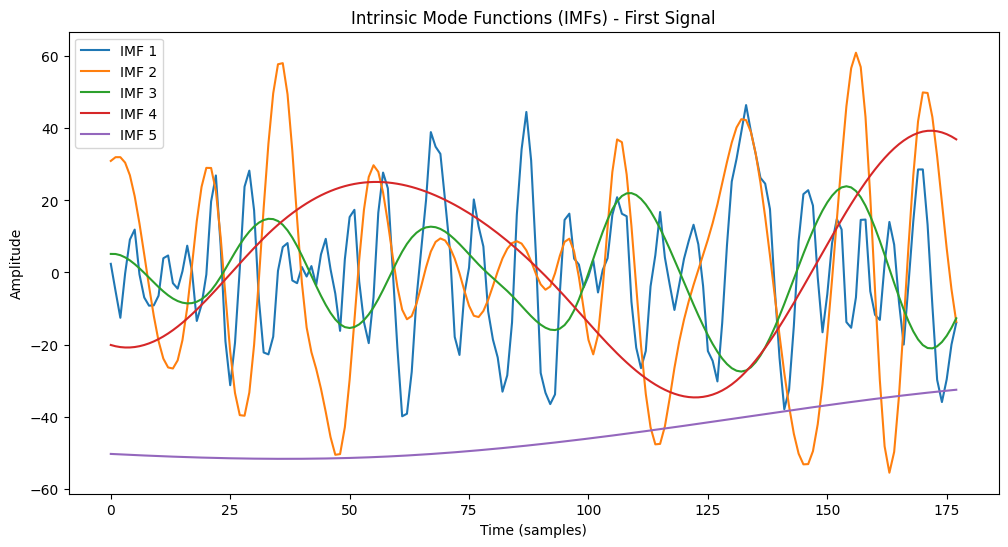

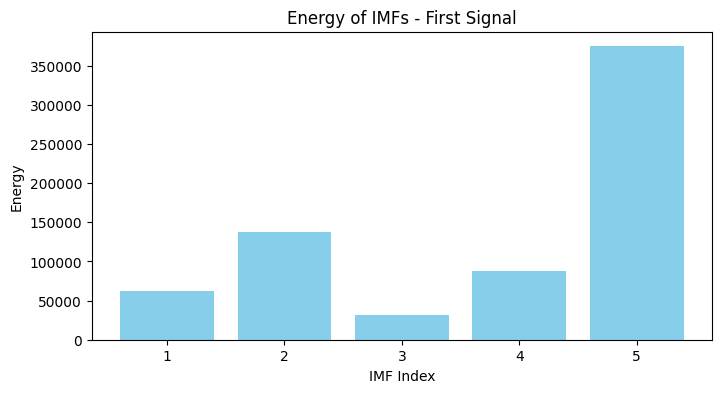

OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PyEMD import EMD

# Load the dataset
df = pd.read_csv('/content/Epileptic Seizure Recognition.csv (1).zip')
df.columns = df.columns.map(str)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Select time-series data columns and target column
X = df.drop(columns=['y'])
y = df['y']

# Initialize storage for features
feature_data = []

# Loop through each signal in the dataset
for idx, signal in X.iterrows():
    # Extract numeric values only, excluding the column header
    signal = signal.values[1:].astype(float)  # Assuming header is in the first position
    emd = EMD()

    # Apply EMD to extract IMFs
    imfs = emd(signal)
    imf_features = []

    # Compute energy for each IMF
    imf_energies = [np.sum(imf**2) for imf in imfs]
    imf_features.extend(imf_energies)

    # Zero-pad to ensure all signals have the same number of IMF features
    max_imf_count = 10  # Set a reasonable upper limit for the number of IMFs
    if len(imf_features) < max_imf_count:
        imf_features.extend([0] * (max_imf_count - len(imf_features)))

    feature_data.append(imf_features[:max_imf_count])

    # Visualization for the first signal
    if idx == 0:
        plt.figure(figsize=(12, 6))
        for i, imf in enumerate(imfs):
            plt.plot(imf, label=f"IMF {i+1}")
        plt.title("Intrinsic Mode Functions (IMFs) - First Signal")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.show()

        plt.figure(figsize=(8, 4))
        plt.bar(range(1, len(imf_energies) + 1), imf_energies, color='skyblue')
        plt.title("Energy of IMFs - First Signal")
        plt.xlabel("IMF Index")
        plt.ylabel("Energy")
        plt.show()

# Convert the feature list to a DataFrame
feature_columns = [f'imf_energy_{i + 1}' for i in range(max_imf_count)]
features_df = pd.DataFrame(feature_data, columns=feature_columns)

# Add target labels to the DataFrame
features_df['y'] = y

# Save the extracted features to a CSV file
features_df.to_csv('/mnt/data/extracted_features_emd.csv', index=False)

print("EMD feature extraction complete. Features saved to 'extracted_features_emd.csv'.")

In [ ]:
!pip install pyeeg
!pip install PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 17.1 MB/s eta 0:00:00
  Created wheel for websocket: filename=websocket-0.2.1-py3-none-any.whl size=192112 sha256=249bff55a70bcefc84fdf5a379605d4e51ef698035c2c9b169af730c355cb1ed
  Stored in directory: /root/.cache/pip/wheels/4a/26/a1/27748366e5f1592b3ff2b896a45fe35be66c257b7926bc5b08
Successfully built websocket
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.1 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-6wd8wrk0
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-6wd8wrk0
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28112 sha256=9825d459e7cd1c0a70a2ff35ce03111776024603d38c21eeab87eb3ca99d4a6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-loshwt0n/wheels/a8/c4/1a/cee09dcc12a11620066d35ace42e3c1e3bfbcc1db3a0ce7788
Successfully built pyeeg
  Attempting uninstall: pyeeg
    Found existing installation: pyeeg 0.0.2
    Uninstalling pyeeg-0.0.2:
      Successfully uninstalled pyeeg-0.0.2


  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-6duy9mdk
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-6duy9mdk
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done


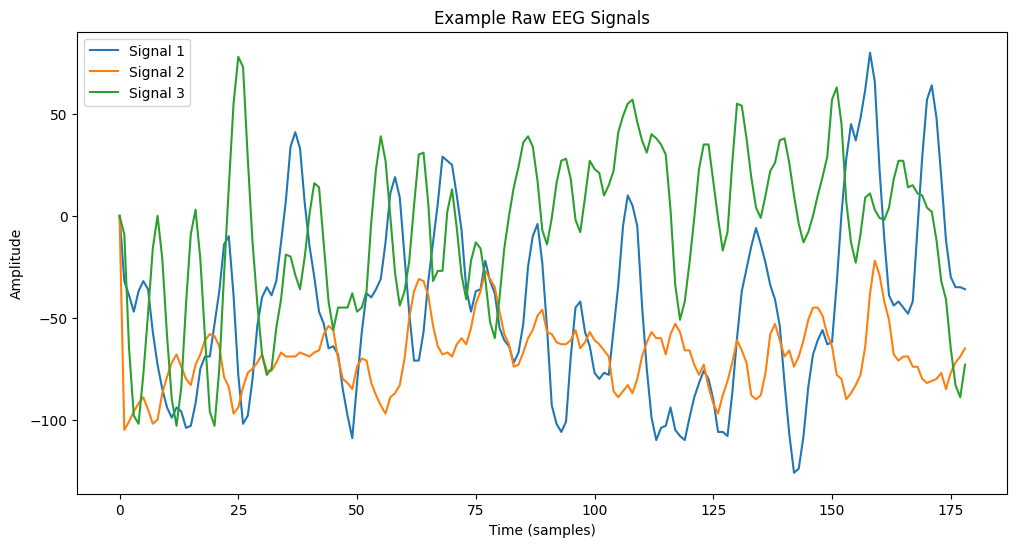

Streaming output truncated to the last 5000 lines.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum esti

OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [ ]:
!pip install EMD-signal
!pip install pyeeg
!pip install PyWavelets
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install mne

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper
import pyeeg
import pywt
from PyEMD import EMD

# Load the dataset
df = pd.read_csv('/content/Epileptic Seizure Recognition.csv (1).zip')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Separate features and target
X = df.drop(columns=['y'])
y = df['y']

# Ensure all data in X is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with 0
X = X.fillna(0)

# Reset the index of X
X = X.reset_index(drop=True)

# Plot the raw EEG signals
plt.figure(figsize=(12, 6))
for i in range(3):
    x_values = range(X.shape[1])  # Use numeric indices for the x-axis
    y_values = X.iloc[i, :].astype(float)  # Ensure values are float
    plt.plot(x_values, y_values, label=f"Signal {i+1}")
plt.title("Example Raw EEG Signals")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Feature extraction
feature_data = []
freq_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 50)
}

for i, signal in X.iterrows():
    signal = signal.values
    features = []

    # Power Spectral Density (PSD) features
    psd, freqs = psd_array_multitaper(signal, sfreq=178, fmin=0.5, fmax=50, adaptive=True, normalization='full')
    for band, (low, high) in freq_bands.items():
        band_power = psd[(freqs >= low) & (freqs <= high)].sum()
        features.append(band_power)

    # Sample Entropy and Higuchi Fractal Dimension features
    try:
        sampen = pyeeg.samp_entropy(signal, m=2, r=0.2 * np.std(signal))
        hfd = pyeeg.hfd(signal, kmax=10)
        features.extend([sampen, hfd])
    except Exception as e:
        features.extend([np.nan, np.nan])

    # Wavelet energy features
    coeffs = pywt.wavedec(signal, 'db4', level=4)
    wavelet_energy = [np.sum(c**2) for c in coeffs]
    features.extend(wavelet_energy)

    feature_data.append(features)

# Create DataFrame for features
feature_columns = (
    [f'{band}_power' for band in freq_bands.keys()] +
    ['sampen', 'hfd'] +
    [f'wavelet_energy_level_{i}' for i in range(len(coeffs))]
)
features_df = pd.DataFrame(feature_data, columns=feature_columns)
features_df['y'] = y

# Save features to CSV
features_df.to_csv('/mnt/data/extracted_features_with_visuals.csv', index=False)
print("Feature extraction and visualization complete. Saved to 'extracted_features_with_visuals.csv'.")


  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-hjla35ec
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-hjla35ec
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done


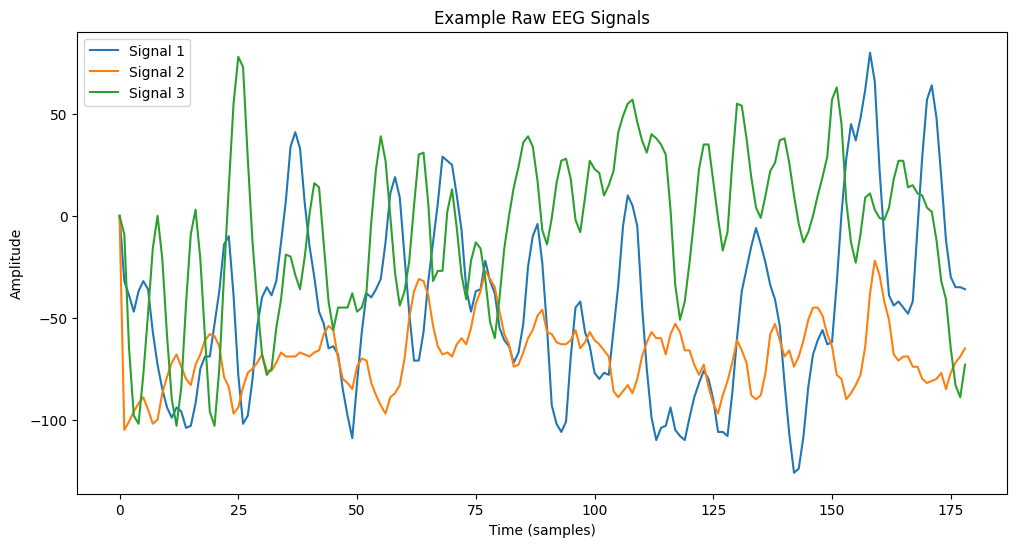

Streaming output truncated to the last 5000 lines.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum esti

In [ ]:
!pip install EMD-signal
!pip install pyeeg
!pip install PyWavelets
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install mne

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper
import pyeeg
import pywt
from PyEMD import EMD

def display_results(features_df):
    """Displays extracted features and basic statistics."""

    print("\nExtracted Features:")
    print(features_df.head())  # Display the first few rows of the features DataFrame

    print("\nDescriptive Statistics:")
    print(features_df.describe())  # Display descriptive statistics of the features


df = pd.read_csv('/content/Epileptic Seizure Recognition.csv (1).zip')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

X = df.drop(columns=['y'])
y = df['y']


X = X.apply(pd.to_numeric, errors='coerce')


X = X.fillna(0)

# Reset the index of X
X = X.reset_index(drop=True)


plt.figure(figsize=(12, 6))
for i in range(3):
    x_values = range(X.shape[1])  # Use numeric indices for the x-axis
    y_values = X.iloc[i, :].astype(float)  # Ensure values are float
    plt.plot(x_values, y_values, label=f"Signal {i+1}")
plt.title("Example Raw EEG Signals")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
feature_data = []
freq_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 50)
}

for i, signal in X.iterrows():
    signal = signal.values
    features = []

    # Power Spectral Density (PSD) features
    psd, freqs = psd_array_multitaper(signal, sfreq=178, fmin=0.5, fmax=50, adaptive=True, normalization='full')
    for band, (low, high) in freq_bands.items():
        band_power = psd[(freqs >= low) & (freqs <= high)].sum()
        features.append(band_power)

    # Sample Entropy and Higuchi Fractal Dimension features
    try:
        sampen = pyeeg.samp_entropy(signal, m=2, r=0.2 * np.std(signal))
        hfd = pyeeg.hfd(signal, kmax=10)
        features.extend([sampen, hfd])
    except Exception as e:
        features.extend([np.nan, np.nan])

    # Wavelet energy features
    coeffs = pywt.wavedec(signal, 'db4', level=4)  # Perform wavelet decomposition
    wavelet_energy = [np.sum(c**2) for c in coeffs]  # Calculate energy for each level
    features.extend(wavelet_energy)

    feature_data.append(features)

# Create DataFrame for features
feature_columns = (
    [f'{band}_power' for band in freq_bands.keys()] +
    ['sampen', 'hfd'] +
    [f'wavelet_energy_level_{i}' for i in range(len(coeffs))]
)
features_df = pd.DataFrame(feature_data, columns=feature_columns)
features_df['y'] = y

# Display results
display_results(features_df)

# Save features to CSV
features_df.to_csv('extracted_features_with_visuals.csv', index=False)  # Save to current directory
print("Feature extraction and visualization complete. Saved to 'extracted_features_with_visuals.csv'.")

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-8tb8c6gv
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-8tb8c6gv
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done


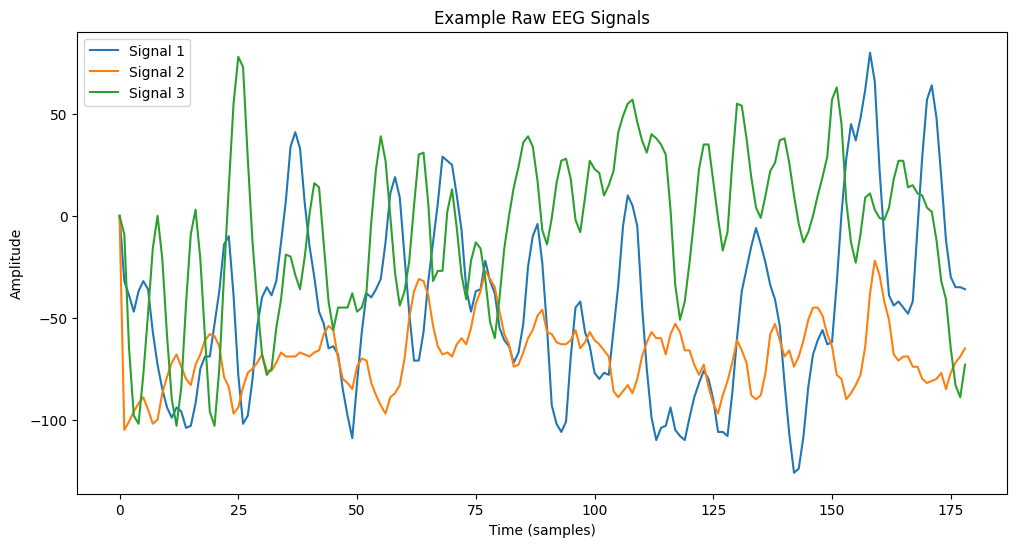

Streaming output truncated to the last 5000 lines.
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum esti

In [ ]:
!pip install EMD-signal
!pip install pyeeg
!pip install PyWavelets
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install mne

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper
import pyeeg
import pywt
from PyEMD import EMD

def display_results(features_df):
    """Displays extracted features and basic statistics."""
    print("\nExtracted Features:")
    print(features_df.head())
    print("\nDescriptive Statistics:")
    print(features_df.describe())

# Load the dataset
df = pd.read_csv('/content/Epileptic Seizure Recognition.csv (1).zip')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Separate features and target
X = df.drop(columns=['y'])
y = df['y']

# Ensure all data in X is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with 0
X = X.fillna(0)

# Reset the index of X
X = X.reset_index(drop=True)

# Plot the raw EEG signals
plt.figure(figsize=(12, 6))
for i in range(3):
    x_values = range(X.shape[1])  # Use numeric indices for the x-axis
    y_values = X.iloc[i, :].astype(float)  # Ensure values are float
    plt.plot(x_values, y_values, label=f"Signal {i+1}")
plt.title("Example Raw EEG Signals")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Feature extraction
feature_data = []
freq_bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 50)
}

for i, signal in X.iterrows():
    signal = signal.values
    features = []

    # Power Spectral Density (PSD) features
    psd, freqs = psd_array_multitaper(signal, sfreq=178, fmin=0.5, fmax=50, adaptive=True, normalization='full')
    for band, (low, high) in freq_bands.items():
        band_power = psd[(freqs >= low) & (freqs <= high)].sum()
        features.append(band_power)

    # Sample Entropy and Higuchi Fractal Dimension features
    try:
        sampen = pyeeg.samp_entropy(signal, m=2, r=0.2 * np.std(signal))
        hfd = pyeeg.hfd(signal, kmax=10)
        features.extend([sampen, hfd])
    except Exception as e:
        features.extend([np.nan, np.nan])

    # Wavelet energy features
    coeffs = pywt.wavedec(signal, 'db4', level=4)  # Perform wavelet decomposition
    wavelet_energy = [np.sum(c**2) for c in coeffs]  # Calculate energy for each level
    features.extend(wavelet_energy)


    zcr = np.sum(np.diff(np.sign(signal)) != 0) / (2 * len(signal))
    features.append(zcr)

    # Hjorth Parameters
    activity = np.var(signal)
    mobility = np.sqrt(np.var(np.diff(signal)) / activity)
    complexity = np.sqrt(np.var(np.diff(np.diff(signal))) / np.var(np.diff(signal)))
    features.extend([activity, mobility, complexity])

    # Petrosian Fractal Dimension
    pfd = pyeeg.pfd(signal)
    features.append(pfd)

    feature_data.append(features)

# Create DataFrame for features
feature_columns = (
    [f'{band}_power' for band in freq_bands.keys()] +
    ['sampen', 'hfd'] +
    [f'wavelet_energy_level_{i}' for i in range(len(coeffs))] +
    ['zcr', 'activity', 'mobility', 'complexity', 'pfd']  # Added feature names
)
features_df = pd.DataFrame(feature_data, columns=feature_columns)
features_df['y'] = y

# Display results
display_results(features_df)

# Save features to CSV
features_df.to_csv('extracted_features_with_visuals.csv', index=False)  # Save to current directory
print("Feature extraction and visualization complete. Saved to 'extracted_features_with_visuals.csv'.")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3376 - loss: 1.3539 - val_accuracy: 0.5733 - val_loss: 0.9854
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5938 - loss: 0.9257 - val_accuracy: 0.6435 - val_loss: 0.7888
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6168 - loss: 0.8065 - val_accuracy: 0.6464 - val_loss: 0.7605
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6464 - loss: 0.7725 - val_accuracy: 0.6667 - val_loss: 0.7273
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6595 - loss: 0.7262 - val_accuracy: 0.6388 - val_loss: 0.7429
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6579 - loss: 0.7268 - val_accuracy: 0.6620 - val_loss: 0.7068
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6587 - loss: 0.7136 - val_accuracy: 0.6678 - val_loss: 0.7097
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6664 - loss: 0.6912 - val_accuracy: 0.

Test Accuracy: 69.62%


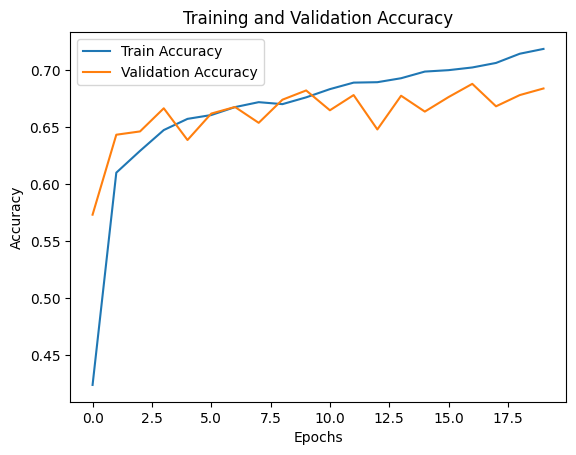

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Epileptic Seizure Recognition.csv (1).zip')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')


df = df.drop(columns=[df.columns[0]])

# Combine signal columns into one array per row
signal_columns = df.columns[:-1]  # Assuming the last column is the target ('y')
X = df[signal_columns].values
y = df['y'].values

# One-hot encode the target variable (assuming multi-class classification)
y = tf.keras.utils.to_categorical(y - 1)  # Classes start from 1 in this dataset

# Normalize the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the data into 2D arrays
# Assuming we reshape the signals into (22, 8) for example
signal_length = X.shape[1]
height = int(np.sqrt(signal_length))
width = signal_length // height
X = X[:, :height * width].reshape(-1, height, width, 1)  # Ensure it's divisible

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the CNN model for 2D data
model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(height, width, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('cnn_model_eeg_2d.h5')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Load the dataset
data = pd.read_csv('/content/Epileptic Seizure Recognition.csv (1).zip')
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

# Prepare features and labels
X = data.drop(columns=['y', data.columns[0]]).values  # Assuming 'y' is the target column
y = data['y'].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.astype(np.float64)


samples, features = X.shape



height = int(np.sqrt(features))
width = int(np.ceil(features / height))
# Pad if necessary to make it a perfect rectangle
pad_size = height * width - features
if pad_size > 0:
    X = np.pad(X, ((0, 0), (0, pad_size)), 'constant')  # Pad with zeros

X = X.reshape((samples, height, width, 1))


scaler = StandardScaler()
X = X.reshape(samples, -1)  # Flatten for scaling
X = scaler.fit_transform(X)
X = X.reshape((samples, height, width, 1))


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(height, width, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Corrected loss function

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2090 - loss: 2.6469 - val_accuracy: 0.2429 - val_loss: 2.3497
Epoch 2/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2674 - loss: 2.3206 - val_accuracy: 0.3258 - val_loss: 2.1349
Epoch 3/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3294 - loss: 2.1117 - val_accuracy: 0.3780 - val_loss: 1.9467
Epoch 4/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3818 - loss: 1.9223 - val_accuracy: 0.4765 - val_loss: 1.7930
Epoch 5/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4182 - loss: 1.7752 - val_accuracy: 0.4870 - val_loss: 1.6645
Epoch 6/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4293 - loss: 1.6542 - val_accuracy: 0.4754 - val_loss: 1.5637
Epoch 7/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4429 - loss: 1.5495 - val_accuracy: 0.4655 - val_loss: 1.4859
Epoch 8/50
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4529 - loss: 1.4714 - val_accuracy: 0.4742 - val_

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


data = pd.read_csv("/content/Epileptic Seizure Recognition.csv.zip")

data = data.drop(columns=[data.columns[0]])

data['y'] = data['y'].replace(5, 0)



X = data.iloc[:, :-1].values  # Features
y = data['y'].values  # Labels

X = pd.DataFrame(X).apply(pd.to_numeric, errors='coerce').values

X = np.nan_to_num(X)


scaler = StandardScaler()
X = scaler.fit_transform(X)


X = X.reshape(X.shape[0], X.shape[1], 1)


y = to_categorical(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 61s 503ms/step - accuracy: 0.2957 - loss: 1.4584 - val_accuracy: 0.3603 - val_loss: 1.3508
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 55s 477ms/step - accuracy: 0.3614 - loss: 1.3514 - val_accuracy: 0.3522 - val_loss: 1.4131
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 479ms/step - accuracy: 0.3529 - loss: 1.3614 - val_accuracy: 0.3815 - val_loss: 1.2104
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 472ms/step - accuracy: 0.3965 - loss: 1.2130 - val_accuracy: 0.4245 - val_loss: 1.2108
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 82s 475ms/step - accuracy: 0.4146 - loss: 1.2260 - val_accuracy: 0.4467 - val_loss: 1.1515
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 83s 481ms/step - accuracy: 0.4325 - loss: 1.1797 - val_accuracy: 0.4299 - val_loss: 1.1417
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 473ms/step - accuracy: 0.4304 - loss: 1.1679 - val_accuracy: 0.4065 - val_loss: 1.1898
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 469ms/step - accuracy: 0.4121 - loss: 1.1829 - val

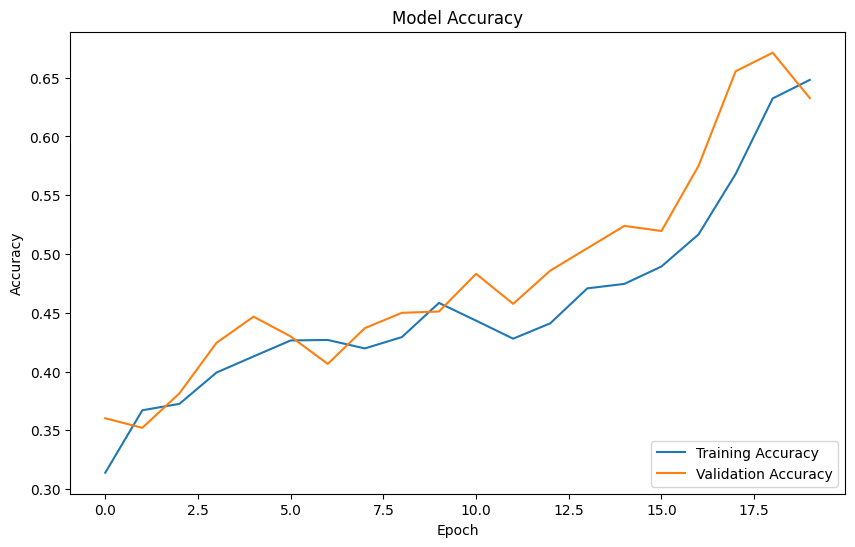

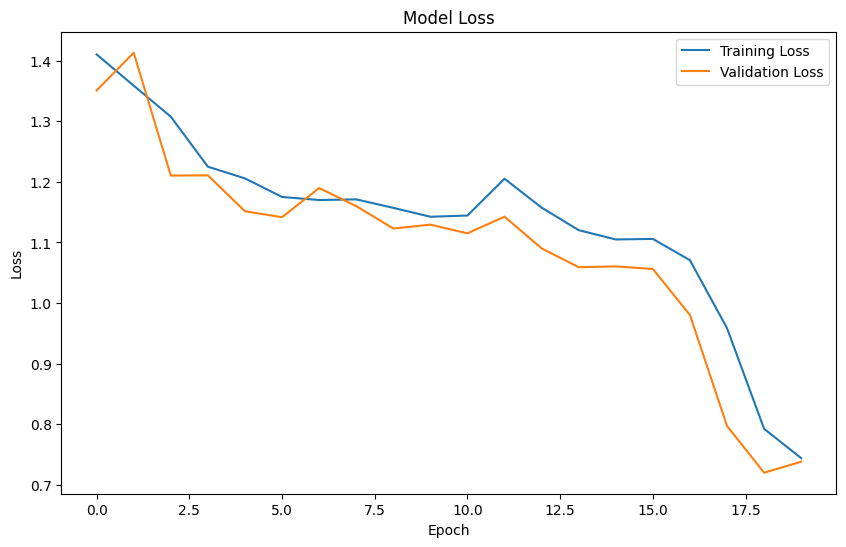

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import numpy as np

# Get predictions from LSTM and CNN models
lstm_predictions = model.predict(X_test)
cnn_predictions = cnn_model.predict(X_test)

# Soft voting: average predictions
ensemble_predictions = (lstm_predictions + cnn_predictions) / 2

# Convert to class labels
final_predictions = np.argmax(ensemble_predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate ensemble model
from sklearn.metrics import accuracy_score, classification_report
print(f"Ensemble Test Accuracy: {accuracy_score(y_test_labels, final_predictions) * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test_labels, final_predictions))


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


NameError: name 'cnn_model' is not defined

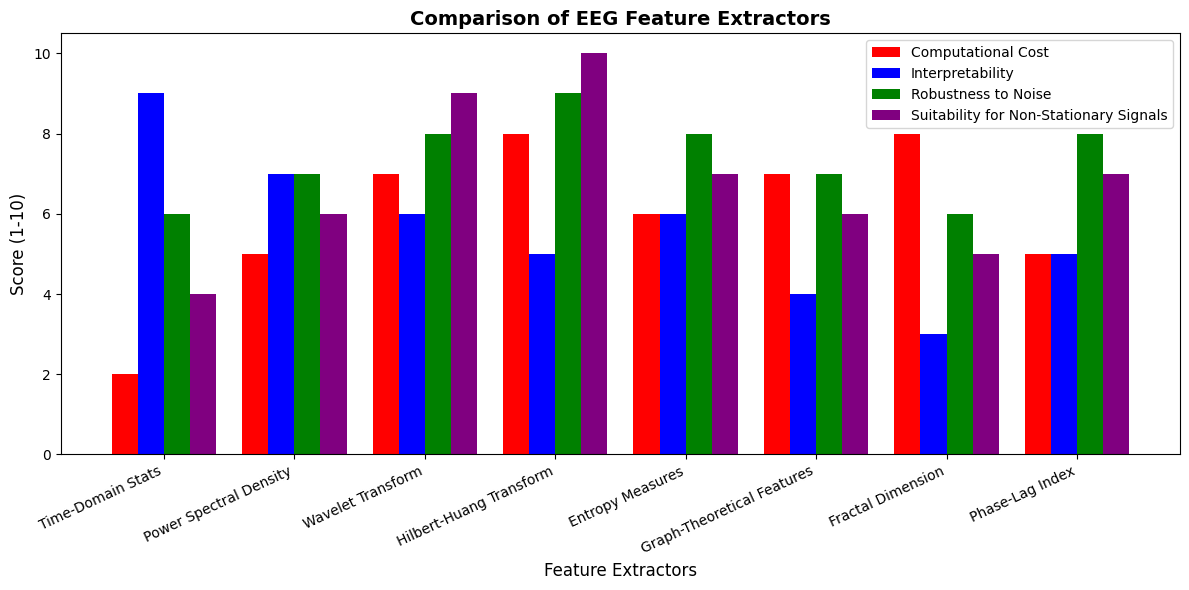

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature extractors
features = [
    "Time-Domain Stats", "Power Spectral Density", "Wavelet Transform",
    "Hilbert-Huang Transform", "Entropy Measures", "Graph-Theoretical Features",
    "Fractal Dimension", "Phase-Lag Index"
]


computational_cost = [2, 5, 7, 8, 6, 7, 8, 5]
interpretability = [9, 7, 6, 5, 6, 4, 3, 5]
robustness_to_noise = [6, 7, 8, 9, 8, 7, 6, 8]
suitability_nonstationary = [4, 6, 9, 10, 7, 6, 5, 7]

bar_width = 0.2
x = np.arange(len(features))


fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - bar_width*1.5, computational_cost, width=bar_width, label="Computational Cost", color="red")
ax.bar(x - bar_width*0.5, interpretability, width=bar_width, label="Interpretability", color="blue")
ax.bar(x + bar_width*0.5, robustness_to_noise, width=bar_width, label="Robustness to Noise", color="green")
ax.bar(x + bar_width*1.5, suitability_nonstationary, width=bar_width, label="Suitability for Non-Stationary Signals", color="purple")


ax.set_xlabel("Feature Extractors", fontsize=12)
ax.set_ylabel("Score (1-10)", fontsize=12)
ax.set_title("Comparison of EEG Feature Extractors", fontsize=14, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=25, ha="right")
ax.legend()


plt.tight_layout()
plt.show()
